In [2]:
print([[512, 512]] * 3)

[[512, 512], [512, 512], [512, 512]]


In [1]:
from neuralforecast.models import NHITS, HEncoder, PatchTST
from neuralforecast.losses.pytorch import MAE, MSE
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info
from neuralforecast import NeuralForecast
import pandas as pd
from neuralforecast.models.hencoder_nomlp import HEncoder as HEncoder_w2d
from neuralforecast.models.hencoder_linearresidual import HEncoder as HEncoder_linearresidual

input_size = 512
horizon = 96
dataset = "ETTh1"
exp_flag = 'ablation'

Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
train_df = Y_df[:-test_size]
test_df = Y_df[-test_size:]

epochs = 300

hencoder = HEncoder(
    h=horizon,
    input_size=input_size,
    max_steps=epochs,
    exclude_insample_y=False,
    stat_exog_list=None,
    hist_exog_list=None,
    futr_exog_list=None,
    decoder_dropout = 0.,
    decomp_kernel_size = 25,
    
    ### MLP:
    mlp_hidden_size = 96,
    mlp_stacks = 1,
    mlp_blocks = 1,  
    mlp_block_layers = 1, 
    n_pool_kernel_size = [2],
    n_freq_downsample=[1],  
    mlp_pooling_mode = "MaxPool1d",
    mlp_interpolation_mode = "linear",
    mlp_dropout=0.0,
    mlp_activation = "ReLU",

    ### former:
    former_input_size = 96,
    former_encoder_layers = 3,
    former_heads = 4,
    former_hidden_size = 32,
    former_linear_size = 256,
    former_dropout = 0.3,
    fc_dropout = 0.3,
    head_dropout = 0.0,
    attn_dropout = 0.0,
    former_patch_len = 16,
    former_stride = 8,
    revin = False,
    revin_affine = False,
    revin_subtract_last = True,
    former_activation = "gelu",
    res_attention = True,
    batch_normalization = True,
    learn_pos_embed = True,
    
    ### basics:
    loss=MSE(),
    valid_loss=None,
    learning_rate = 1e-3,
    num_lr_decays = 3,
    early_stop_patience_steps = -1,
    val_check_steps = 100,
    batch_size = 32,
    valid_batch_size = None,
    windows_batch_size=64,
    inference_windows_batch_size = -1,
    step_size = 1,
    scaler_type = None,
    random_seed = 1,
    num_workers_loader = 0,
    drop_last_loader = False,
)

hencoder_w2d = HEncoder_w2d(
    h=horizon,
    input_size=input_size,
    max_steps=epochs,
    exclude_insample_y=False,
    stat_exog_list=None,
    hist_exog_list=None,
    futr_exog_list=None,
    decoder_dropout = 0.,
    decomp_kernel_size = 25,
    
    ### MLP:
    mlp_hidden_size = 128,
    mlp_stacks = 3,
    mlp_blocks = 1,  
    mlp_block_layers = 1, 
    n_pool_kernel_size = [2, 2, 1],
    n_freq_downsample=[4, 2, 1],  
    mlp_pooling_mode = "MaxPool1d",
    mlp_interpolation_mode = "linear",
    mlp_dropout=0.0,
    mlp_activation = "ReLU",

    ### former:
    former_input_size = input_size,
    former_encoder_layers = 1,
    former_heads = 4,
    former_hidden_size = 64,
    former_linear_size = 256,
    former_dropout = 0.3,
    fc_dropout = 0.0,
    head_dropout = 0.0,
    attn_dropout = 0.0,
    former_patch_len = 16,
    former_stride = 8,
    revin = False,
    revin_affine = False,
    revin_subtract_last = True,
    former_activation = "gelu",
    res_attention = True,
    batch_normalization = True,
    learn_pos_embed = True,
    
    ### basics:
    loss=MAE(),
    valid_loss=None,
    learning_rate = 1e-3,
    num_lr_decays = 3,
    early_stop_patience_steps = -1,
    val_check_steps = 100,
    batch_size = 32,
    valid_batch_size = None,
    windows_batch_size=64,
    inference_windows_batch_size = -1,
    step_size = 1,
    scaler_type = "identity",
    random_seed = 1,
    num_workers_loader = 0,
    drop_last_loader = False,
)

hencoder_linearresidual = HEncoder_linearresidual(
    h=horizon,
    input_size=input_size,
    max_steps=epochs,
    exclude_insample_y=False,
    stat_exog_list=None,
    hist_exog_list=None,
    futr_exog_list=None,
    decoder_dropout = 0.,
    decomp_kernel_size = 49,
    
    ### MLP:
    mlp_hidden_size = 128,
    mlp_stacks = 3,
    mlp_blocks = 1,  
    mlp_block_layers = 1, 
    n_pool_kernel_size = [16, 8, 1],
    n_freq_downsample=[96, 24, 8],  
    mlp_pooling_mode = "MaxPool1d",
    mlp_interpolation_mode = "linear",
    mlp_dropout=0.0,
    mlp_activation = "ReLU",

    ### former:
    former_input_size = 96,
    former_encoder_layers = 1,
    former_heads = 4,
    former_hidden_size = 64,
    former_linear_size = 256,
    former_dropout = 0.3,
    fc_dropout = 0.0,
    head_dropout = 0.0,
    attn_dropout = 0.0,
    former_patch_len = 16,
    former_stride = 8,
    revin = False,
    revin_affine = False,
    revin_subtract_last = True,
    former_activation = "gelu",
    res_attention = True,
    batch_normalization = True,
    learn_pos_embed = True,
    
    ### basics:
    loss=MAE(),
    valid_loss=None,
    learning_rate = 1e-3,
    num_lr_decays = 3,
    early_stop_patience_steps = -1,
    val_check_steps = 100,
    batch_size = 32,
    valid_batch_size = None,
    windows_batch_size=64,
    inference_windows_batch_size = -1,
    step_size = 1,
    scaler_type = "identity",
    random_seed = 1,
    num_workers_loader = 0,
    drop_last_loader = False,
)

nf = NeuralForecast(models=[hencoder, hencoder_w2d, hencoder_linearresidual], freq=freq)
nf.fit(df=train_df, val_size=val_size)


d:\code\env\hencoder\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Global seed set to 1
Global seed set to 1
Global seed set to 1


16-mixed
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]mlp编码器的参数量： 92960
tst编码器的参数量： 63971
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s, v_num=191, train_loss_step=0.513, train_loss_epoch=0.513, valid_loss=5.37e+9]
16-mixed
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s, v_num=192, train_loss_step=0.519, train_loss_epoch=0.519, valid_loss=6.48e+4]
16-mixed
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 10.56it/s, v_num=193, train_loss_step=0.476, train_loss_epoch=0.476, valid_loss=6.48e+4]


In [2]:
pred_df = nf.predict(df=test_df[:-400])

16-mixed


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 56.45it/s]
16-mixed
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 106.20it/s]
16-mixed
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 150.22it/s]


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# import os
# results = pd.merge(test_df, pred_df, on="ds", how="outer")
results_df = pd.merge(test_df, pred_df, on="ds", how="outer")

# resultdir:str = 'exp_results'
# filename: str = exp_flag+'_'+dataset+'_'+str(horizon)+"_results.csv"
# results.to_csv(os.path.join(resultdir,filename), index=False)

In [4]:
results_df

,index,ds,unique_id,y,HEncoder,HEncoder1,HEncoder2
0,116040,2017-10-24 00:00:00,OT,-0.900832,NaN,NaN,NaN
1,116041,2017-10-24 01:00:00,OT,-0.909211,NaN,NaN,NaN
2,116042,2017-10-24 02:00:00,OT,-0.867077,NaN,NaN,NaN
3,116043,2017-10-24 03:00:00,OT,-0.917590,NaN,NaN,NaN
4,116044,2017-10-24 04:00:00,OT,-0.959725,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2875,118915,2018-02-20 19:00:00,OT,-2.003877,NaN,NaN,NaN
2876,118916,2018-02-20 20:00:00,OT,-2.003877,NaN,NaN,NaN
2877,118917,2018-02-20 21:00:00,OT,-1.776565,NaN,NaN,NaN
2878,118918,2018-02-20 22:00:00,OT,-1.742809,NaN,NaN,NaN


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# pred_df = pd.read_csv('./exp_results/ablation_ETTm1_336_results.csv', index_col='index')
# pred_df["ds"] = pd.to_datetime(pred_df["ds"])


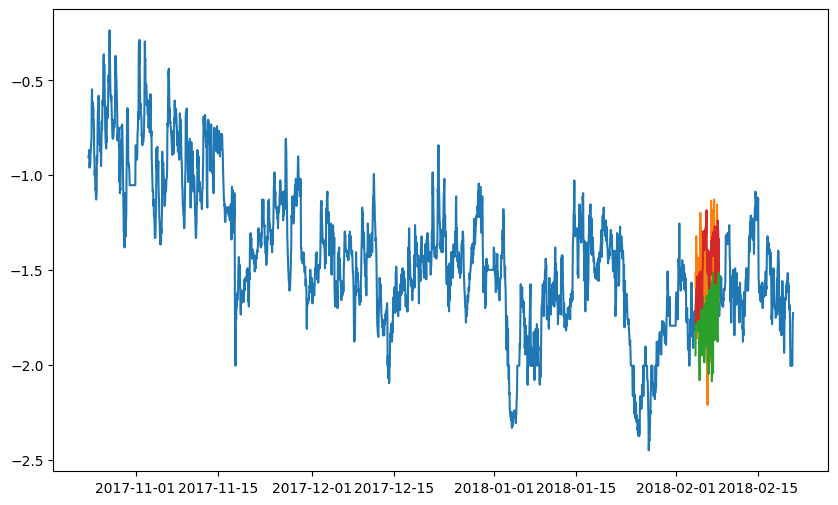

In [6]:


plt.figure(figsize=(10, 6))
plt.plot(results_df['ds'],results_df["y"].values)
plt.plot(results_df['ds'],results_df['HEncoder1'].values)
plt.plot(results_df['ds'],results_df['HEncoder2'].values)
plt.plot(results_df['ds'],results_df['HEncoder'].values)

# plt.plot(pred_df['ds'],pred_df['HEncoder2'].values)
# plt.plot(pred_df['ds'],pred_df['PatchTST'].values)


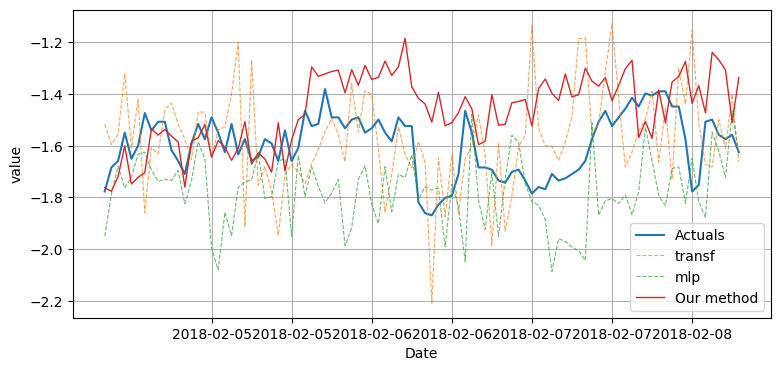

In [7]:
from datetime import datetime
results_df = results_df.dropna()
plt.figure(figsize=(9, 4))
plt.grid(True)
plt.plot(results_df['ds'],results_df['y'].values, label='Actuals',linewidth=1.5)
plt.plot(results_df['ds'],results_df['HEncoder1'].values, label='transf',linestyle='--',alpha=0.7,linewidth=0.8)
plt.plot(results_df['ds'],results_df['HEncoder2'].values, label='mlp',linestyle='--',alpha=0.7,linewidth=0.8)
# plt.plot(pred_df['ds'],pred_df['HEncoder2'].values, label='With linear projection guidance',linestyle='--',alpha=0.7,linewidth=0.8)
plt.plot(results_df['ds'],results_df['HEncoder'].values, label='Our method',linewidth=1)


# plt.plot(pred_df['ds'],pred_df['PatchTST'].values, label='PatchTST',linestyle='--',alpha=0.5)
# plt.xlim(datetime(2018,1,31),datetime(2018,2,11))
ticks, _ = plt.xticks()
plt.xticks(ticks[1:])
plt.legend()
plt.xlabel('Date')
plt.ylabel('value')
plt.show()